<a href="https://colab.research.google.com/github/sivask01/CMPE257-Fall23-Sivakrishna-Yaganti/blob/homework-2/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

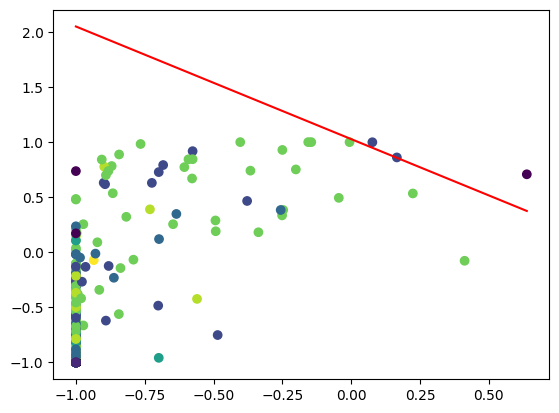

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    data = np.loadtxt(filename)
    Y = data[:, 0]
    # Adding a bias term (column of ones) to X
    X = np.c_[np.ones(data.shape[0]), data[:, 1:]]
    return X, Y

def pla_algorithm(X, Y, max_iterations=1000):
    w = np.zeros(X.shape[1])
    for iteration in range(max_iterations):
        mistakes = 0
        for x, y in zip(X, Y):
            y_hat = np.sign(np.dot(w, x))
            if y_hat != y:
                w += y * x
                mistakes += 1
        if mistakes == 0:
            break
    return w
# Load the data
X, Y = load_data('ZipDigits.train')

# Run the PLA
w = pla_algorithm(X, Y)

# Plotting
plt.scatter(X[:, 1], X[:, 2], c=Y)  # assuming X[:, 1] and X[:, 2] are your two main features
x_vals = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
y_vals = -(w[0] + w[1] * x_vals) / w[2]
plt.plot(x_vals, y_vals, '-r')
plt.show()

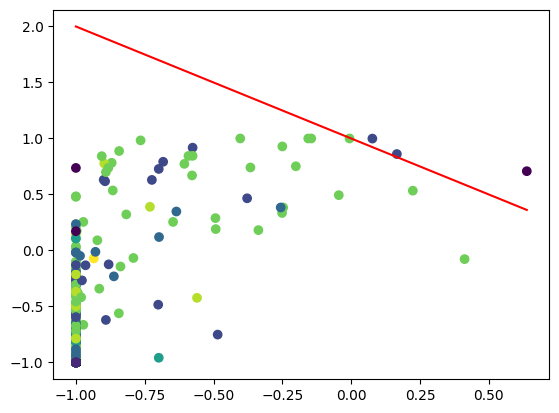

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    data = np.loadtxt(filename)
    Y = data[:, 0]
    # Adding a bias term (column of ones) to X
    X = np.c_[np.ones(data.shape[0]), data[:, 1:]]
    return X, Y

def pocket_algorithm(X, Y, max_iterations=1000):
    w = np.zeros(X.shape[1])
    pocket_w = np.copy(w)
    pocket_errors = np.inf

    for iteration in range(max_iterations):
        for x, y in zip(X, Y):
            y_hat = np.sign(np.dot(w, x))
            if y_hat != y:
                w += y * x
                current_errors = np.sum(np.sign(X.dot(w)) != Y)
                if current_errors < pocket_errors:
                    pocket_errors = current_errors
                    pocket_w = np.copy(w)
    return pocket_w

# Load the data
X, Y = load_data('ZipDigits.train')

# Run the Pocket algorithm
w = pocket_algorithm(X, Y)

# Plotting
plt.scatter(X[:, 1], X[:, 2], c=Y)  # assuming X[:, 1] and X[:, 2] are your two main features
x_vals = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
y_vals = -(w[0] + w[1] * x_vals) / w[2]
plt.plot(x_vals, y_vals, '-r')
plt.show()

**C**
The pocket algorithm, by design, aims to return the best hypothesis it has seen over its course of iterations. Its typically expected to perform better (or at least no worse) than the PLA on the test dataset, especially when the data is not linearly separable.

In other words:

If the data is linearly separable, both PLA and the pocket algorithm will converge to a solution that separates the data, and their test error might be comparable.
If the data is not linearly separable, the pocket algorithm is expected to outperform the standard PLA because

***LP2***

In [10]:
def third_order_transform(data):
  x1 = data[:, 1]
  x2 = data[:, 2]
  third_order_data = np.vstack([np.ones(x1.shape[0]), x1, x2, x1**2, x2**2, x1*x2, x1**3, (x1**2)*x2, x1*(x2**2)]).T
  return third_order_data

# Load the data
X, Y = load_data('ZipDigits.train')
x2, y2 = load_data('ZipDigits.test')
train_features = third_order_transform(X)
test_features = third_order_transform(x2)

weights = pocket_algorithm(train_features, Y, 100)


In [11]:
weights = pocket_algorithm(train_features, Y, 100)

In [12]:
weights

array([ 6., -6., -6.,  6.,  6.,  6., -6., -6., -6.])

In [13]:
def compute_error(X, Y, w):
    Y_pred = np.sign(X.dot(w))
    error = np.mean(Y_pred != Y)
    return error

# Compute test error
test_error = compute_error(test_features, y2, weights)
print(f'Test error: {test_error*100:.2f}%')

Test error: 86.85%


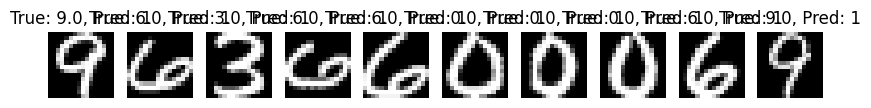

In [30]:
def plot_misclassified(X_original, X_transformed, Y, w, num_samples=10):
    Y_pred = np.sign(X_transformed.dot(w))
    misclassified_indices = np.where(Y != Y_pred)[0]
    num_samples = min(num_samples, len(misclassified_indices))

    fig, axes = plt.subplots(1, num_samples, figsize=(10, 2))
    for i in range(num_samples):
        ax = axes[i]
        index = misclassified_indices[i]
        img = X_original[index, 1:].reshape(16, 16)  # Adjust shape as per your original data
        ax.imshow(img, cmap='gray')
        ax.set_title(f'True: {Y[index]}, Pred: {int(Y_pred[index])}')
        ax.axis('off')
    plt.show()

# Ensure X_original contains original image data, test_features contains transformed data, and Y_test has corresponding labels.
plot_misclassified(x2, test_features, y2, weights)
